In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/dataset.csv")
df['timestamp'] = pd.to_datetime(df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'], dayfirst=True)
df['VehicleType'] = df['VehicleType'].map({'car': 1, 'bike': 0.5, 'truck': 1.5})
df['TrafficConditionNearby'] = df['TrafficConditionNearby'].map({'low': 1, 'medium': 2, 'high': 3})
df.fillna(0, inplace=True)

In [5]:
df['base_price'] = 10.0
df['price_model_1'] = df['base_price']
df['price_model_2'] = df['base_price']

In [6]:
alpha1 = 1.0
alpha2, beta, gamma, delta, epsilon, lambd = 0.5, 0.3, 0.2, 1.0, 0.3, 0.5

In [7]:
for lot_id, lot_df in df.groupby('SystemCodeNumber'):
    lot_df = lot_df.sort_values('timestamp')
    prices_m1 = []
    prices_m2 = []
    prev_price_m1 = 10.0

    for _, row in lot_df.iterrows():
        occ_ratio = row['Occupancy'] / row['Capacity'] if row['Capacity'] > 0 else 0

        # Model 1: Linear with occupancy
        price_m1 = prev_price_m1 + alpha1 * occ_ratio
        prices_m1.append(price_m1)
        prev_price_m1 = price_m1

        # Model 2: Demand-based
        demand = (
            alpha2 * occ_ratio +
            beta * row['QueueLength'] -
            gamma * row['TrafficConditionNearby'] +
            delta * row['IsSpecialDay'] +
            epsilon * row['VehicleType']
        )
        norm_demand = (demand - df['Occupancy'].min()) / (df['Occupancy'].max() - df['Occupancy'].min() + 1e-6)
        price_m2 = row['base_price'] * (1 + lambd * norm_demand)
        price_m2 = np.clip(price_m2, 5, 20)
        prices_m2.append(price_m2)

    df.loc[lot_df.index, 'price_model_1'] = prices_m1
    df.loc[lot_df.index, 'price_model_2'] = prices_m2

In [8]:
example_lot = df[df['SystemCodeNumber'] == df['SystemCodeNumber'].iloc[0]]
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

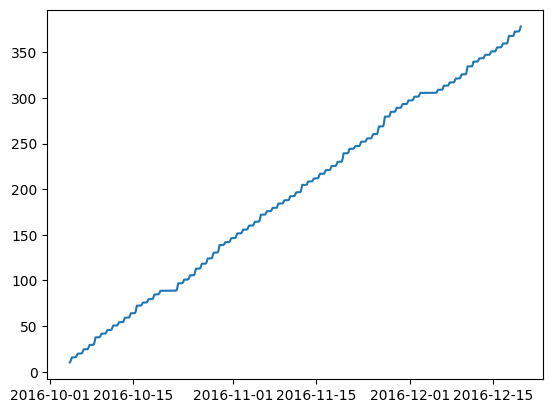

In [9]:
plt.plot(example_lot['timestamp'], example_lot['price_model_1'], label='Model 1: Linear')

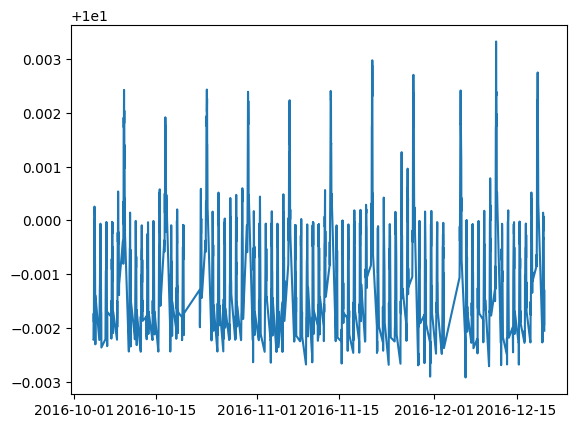

In [10]:
plt.plot(example_lot['timestamp'], example_lot['price_model_2'], label='Model 2: Demand-Based')

Text(0.5, 0, 'Time')

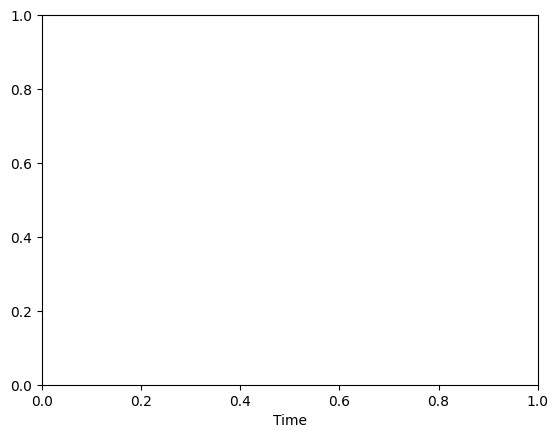

In [11]:
plt.xlabel("Time")

Text(0, 0.5, 'Price ($)')

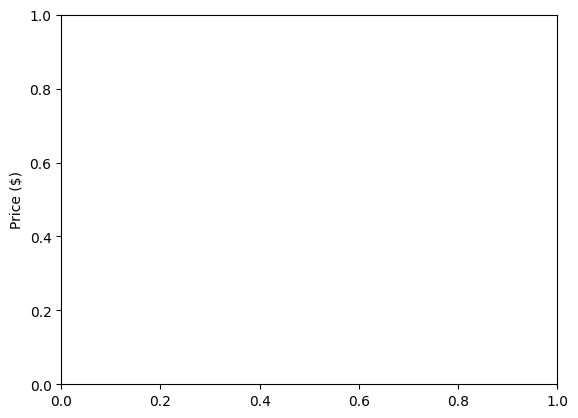

In [12]:
plt.ylabel("Price ($)")

Text(0.5, 1.0, 'Dynamic Pricing for Lot: BHMBCCMKT01')

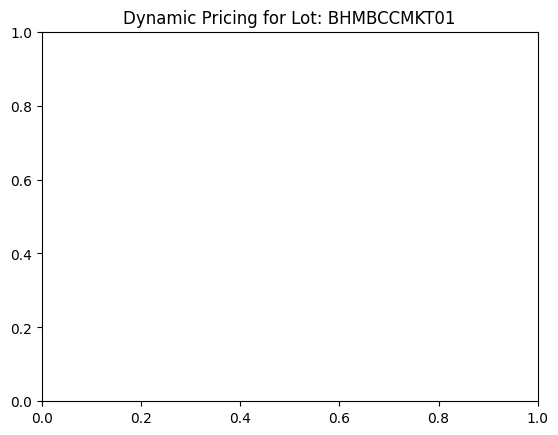

In [13]:
plt.title(f"Dynamic Pricing for Lot: {example_lot['SystemCodeNumber'].iloc[0]}")

/tmp/ipython-input-14-4061938096.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


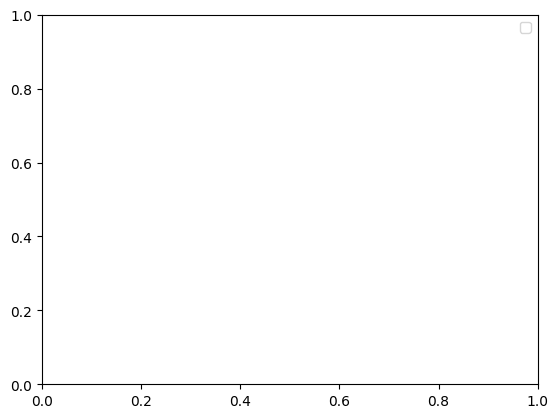

In [14]:
plt.legend()

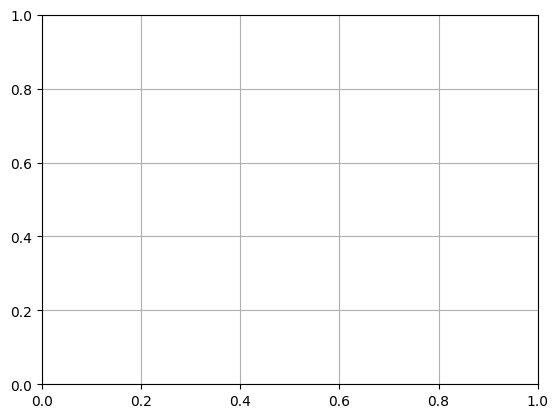

In [15]:
plt.grid(True)

In [16]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [17]:
plt.show()